<a href="https://colab.research.google.com/github/david-hp-0726/Gcloud_Translation_API_Project/blob/main/Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>QTM 250 Homework 4</h1>
<h4>Group Members: Maura Dianno, Jin Lee, David Chen, Indraneel Massie, Elizabeth Sweeney Benzon</h4>

<h2>Set Up Working Environment</h2>

In [ ]:
# import libraries
import pandas as pd
import os
import sklearn
import re
import matplotlib.pyplot as plt
from google.cloud import translate_v2
from google.cloud import translate
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# upload the credential json file and store it as an enironmental variable called "GOOGLE_APPLICATION_CREDENTIALS"
files.upload()
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "api_credentials.json"

Saving api_credentials.json to api_credentials.json


In [ ]:
# define a function that computes the cosine similarity score of two texts
def text_similarity(text1, text2):
  # remove punctuations and make text all lowercase
  text1 = re.sub('[^\w\s]', '', text1).lower()
  text2 = re.sub('[^\w\s]', '', text2).lower()

  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform([text1, text2])
  similarity = cosine_similarity(vectors)
  return similarity[1,0]

# define a function that translate back and forth between two languages for a specified number of rounds
def repeat_translate(text, original_language, target_language, num_rounds):
  translator = translate_v2.Client()
  if (original_language is None):
    original_language = translator.detect_language(text)["language"]

  intermediate_text_original = text
  intermediate_text_target = None
  for round in range(0, num_rounds):
    intermediate_text_target = translator.translate(intermediate_text_original, 
                                             target_language = target_language,
                                             model = "nmt")["translatedText"]
    intermediate_text_original = translator.translate(intermediate_text_target, 
                                             target_language = original_language,
                                             model = "nmt")["translatedText"]
  return [intermediate_text_original, intermediate_text_target]

# define a dictionary that maps that maps the names of languages to ISO-639 code
language_map = {"English": "en", "French": "fr", "German": "de", "Mandarin": "zh", "Russian": "ru", "Latin": "la", "Korean": "ko", "Japanese": "ja", "Arabic": "ar"}


In [ ]:
from scipy.optimize._lsq.common import print_header_linear
from sqlalchemy import true
#@title ## Cloud Translation API Demo
text = "My name is Maura" #@param {type: "string"} 
original_language = "English" #@param {type: "string"} ["English", "French", "German", "Mandarin", "Russian", "Latin", "Korean", "Japanese", "Arabic"]
target_language = "Russian" #@param {type: "string"} ["English", "French", "German", "Mandarin", "Russian", "Latin", "Korean", "Japanese", "Arabic"]
num_rounds = 3 #@param {type: "slider", min: 1, max: 50}
print_original_text = True #@param {type: "boolean"}
print_translated_text_original = True #@param {type: "boolean"}
print_translated_text_target = True #@param {type: "boolean"}
print_similarity_score = True #@param {type: "boolean"}

original_language = language_map[original_language]
target_language = language_map[target_language]
translated_texts = repeat_translate(text, original_language, target_language, num_rounds)
if (print_original_text):
  print(f"Original Text (length = {len(text.split())}): {text}")

if (print_translated_text_original):
  print(f"Translated Text (length = {len(translated_texts[0].split())}): {translated_texts[0]}")

if (print_translated_text_target):
  print(f"Translated Text (target): {translated_texts[1]}")

if (print_similarity_score):
  print(f"Similarity Score: {text_similarity(text, translated_texts[0])}")
  print(f"Number of Unique Words That Match: {len(set(text.split()).intersection(set(translated_texts[0].split())))}")

Original Text (length = 4): My name is Maura
Translated Text (length = 4): My name is Maura
Translated Text (target): Меня зовут Маура
Similarity Score: 1.0
Number of Unique Words That Match: 4


<h2>Defining Explanatory Variables</h2>
<ol>
  <li>Content of the text</li>
  <li>Target language</li>
  <li>Number of times the text is translated back and forth</li>
</ol>

* ***News Article***: [Trump asks to delay sexual assault trial following historic indictment](https://www.cnn.com/2023/04/12/politics/e-jean-carroll-trump-lawyers-trial/index.html)
* ***Scientific Article***: [How hard wired is human behavior](https://hbr.org/1998/07/how-hardwired-is-human-behavior)
* ***Philosophical Essay***: [Introduction to Critique of Pure Reason](https://www.marxists.org/reference/subject/ethics/kant/reason/ch01.htm)
* ***Speech***: [Barack Obama's 2008 New Hampshire Primary Speech](https://gist.github.com/mcdickenson/25479c8571b8f86f3a21c8d579102f93)

In [ ]:
# upload all four texts with names as specified below
files.upload()
files.upload()
files.upload()
files.upload()

# define variables
filenames = ['philosophical_essay.txt', 'news_article.txt', 'scientific_article.txt', 'speech.txt'] # to be uploaded
var1_text = [open(filename).read().replace('\n', '') for filename in filenames] # to be uploaded
var2_target_language = ["French", "German", "Mandarin", "Russian", "Latin", "Korean", "Japanese", "Arabic"]
var3_num_translations = [1, 2, 5, 10]

<h2>Fetching Data from API</h2>

In [ ]:
# define an empty dataframe to store data
result = pd.DataFrame(columns = ["Original_Language", "Target_Language", "Content_Type", "Num_Rounds", "Similarity_Score"])
original_language = "English"

# translate the input texts for the specified number
for text_idx in range(0, len(var1_text)):
  text_name = filenames[text_idx].split('.')[0]
  original_text = var1_text[text_idx]
  for target_language in var2_target_language:
    for num_rounds in var3_num_translations:
      translated_text = repeat_translate(original_text, language_map[original_language], language_map[target_language], num_rounds)[0]
      similarity_score = text_similarity(original_text, translated_text)

      # append new row to dataframe
      new_row = [original_language, target_language, text_name, num_rounds, similarity_score]
      result.loc[len(result)] = new_row

In [ ]:
# Overview of Result Dataframe
result.head()

,Original_Language,Target_Language,Content_Type,Num_Rounds,Similarity_Score
0,English,French,philosophical_essay,1,0.942901
1,English,French,philosophical_essay,2,0.941636
2,English,French,philosophical_essay,5,0.943477
3,English,French,philosophical_essay,10,0.943281
4,English,German,philosophical_essay,1,0.914609


<h2>Data Analysis</h2>

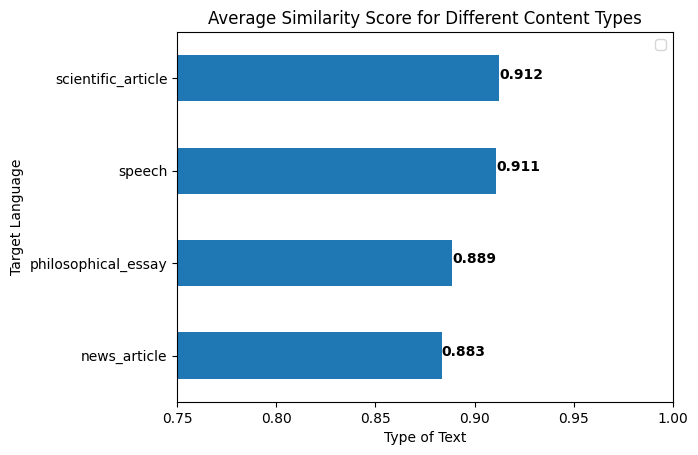

In [191]:
result_content = result.groupby("Content_Type").agg(Average_Similarity_Score = ("Similarity_Score", "mean")).sort_values("Average_Similarity_Score").reset_index()
result_content.plot("Content_Type", "Average_Similarity_Score", kind = "barh")
plt.legend([])
plt.xlabel("Type of Text")
plt.ylabel("Target Language")
plt.title("Average Similarity Score for Different Content Types")
plt.xlim(0.75, 1)

for i in range(0, len(result_content)):
  score = result_content.loc[i, "Average_Similarity_Score"]
  plt.text(score, i, str(round(score, 3)), fontweight = "bold")

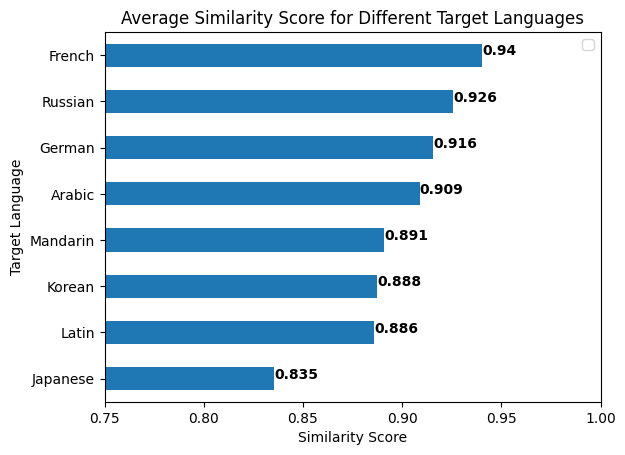

In [188]:
result_language = result.groupby("Target_Language").agg(Average_Similarity_Score = ("Similarity_Score", "mean")).sort_values("Average_Similarity_Score").reset_index()
result_language.plot("Target_Language", "Average_Similarity_Score", kind = "barh")
plt.legend([])
plt.xlabel("Similarity Score")
plt.ylabel("Target Language")
plt.title("Average Similarity Score for Different Target Languages")
plt.xlim(0.75, 1)

for i in range(0, len(result_language)):
  score = result_language.loc[i, "Average_Similarity_Score"]
  plt.text(score, i, str(round(score, 3)), fontweight = "bold")

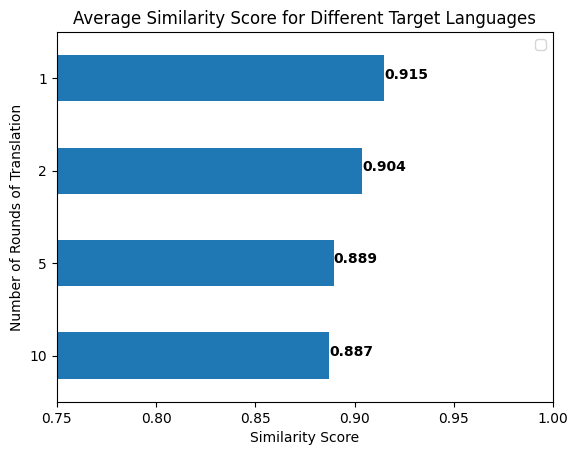

In [189]:
result_numrounds = result.groupby("Num_Rounds").agg(Average_Similarity_Score = ("Similarity_Score", "mean")).sort_values("Average_Similarity_Score").reset_index()
result_numrounds.plot("Num_Rounds", "Average_Similarity_Score", kind = "barh")
plt.legend([])
plt.xlabel("Similarity Score")
plt.ylabel("Number of Rounds of Translation")
plt.title("Average Similarity Score for Different Target Languages")
plt.xlim(0.75, 1)

for i in range(0, len(result_numrounds)):
  score = result_numrounds.loc[i, "Average_Similarity_Score"]
  plt.text(score, i, str(round(score, 3)), fontweight = "bold")

Target_Language,Arabic,French,German,Japanese,Korean,Latin,Mandarin,Russian
Num_Rounds,,,,,,,,
1,0.920915,0.942914,0.924166,0.888043,0.894856,0.914961,0.902749,0.930344
2,0.913331,0.938832,0.917366,0.864063,0.886071,0.889836,0.894670,0.925814
5,0.905409,0.939704,0.913263,0.790542,0.884801,0.873064,0.885140,0.923826
10,0.896100,0.939760,0.907386,0.799212,0.884570,0.865965,0.881253,0.923462


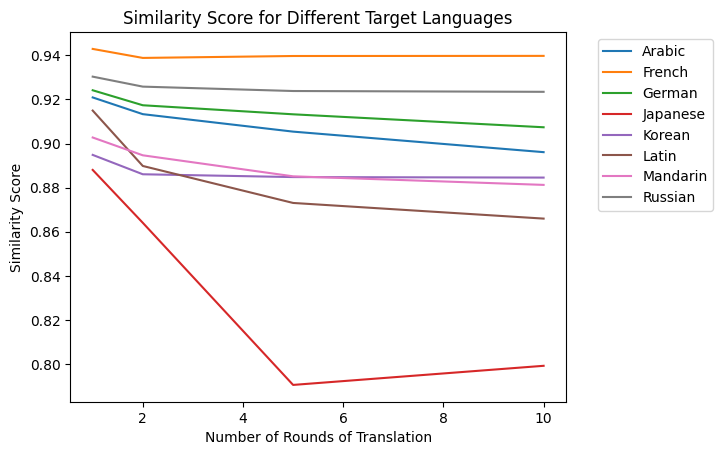

In [ ]:
result_language_numrounds = pd.pivot_table(result, index = "Target_Language", columns = "Num_Rounds", values = "Similarity_Score").T
display(result_language_numrounds)
for column in result_language_numrounds.columns:
  result_language_numrounds[column].plot()
plt.xlabel("Number of Rounds of Translation")
plt.ylabel("Similarity Score")
plt.title("Similarity Score for Different Target Languages")
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

Content_Type,news_article,philosophical_essay,scientific_article,speech
Num_Rounds,,,,
1,0.911864,0.907566,0.921694,0.918349
2,0.899204,0.890253,0.912794,0.912740
5,0.857231,0.881823,0.910485,0.908335
10,0.865589,0.875304,0.904328,0.903633


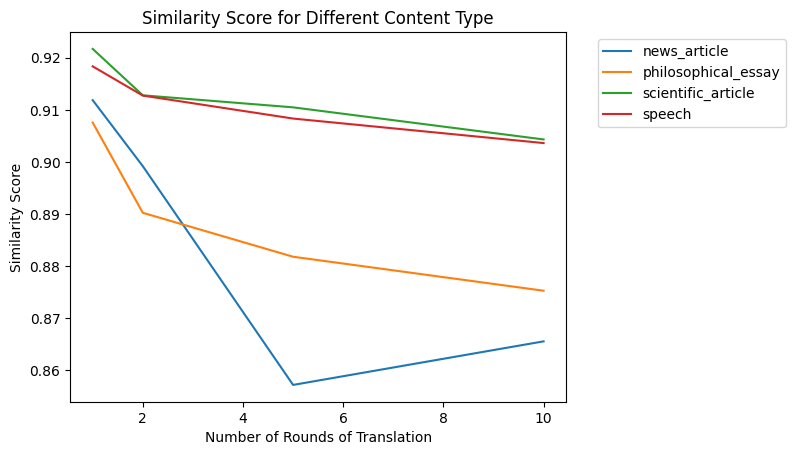

In [ ]:
result_type_numrounds = pd.pivot_table(result, index = "Content_Type", columns = "Num_Rounds", values = "Similarity_Score").T
display(result_type_numrounds)
for column in result_type_numrounds.columns:
  result_type_numrounds[column].plot()
plt.xlabel("Number of Rounds of Translation")
plt.ylabel("Similarity Score")
plt.title("Similarity Score for Different Content Type")
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

<h2>Discussion</h2>